---
# Regresiones Lineales SKLearn


---

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

%matplotlib inline

#### Carga de los datos a analizar

In [10]:
df = pd.read_csv('Galton.txt', sep='\t')

#### Breve análisis exploratorio

In [13]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [15]:
df.groupby('Gender').mean(numeric_only=True)

,Father,Mother,Height,Kids
Gender,,,,
F,69.302309,64.169515,64.110162,6.311778
M,69.168172,64.005161,69.228817,5.972043


#### Análisis visual

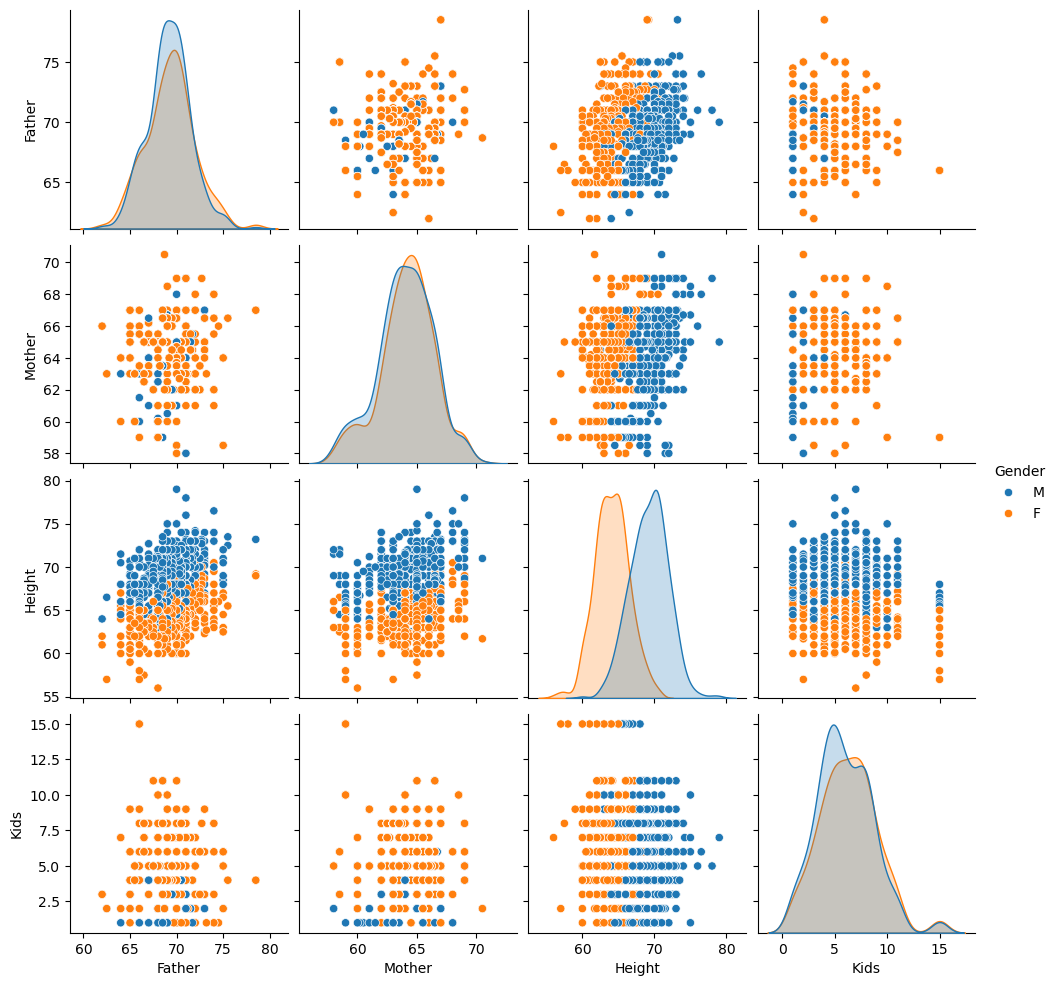

In [18]:
# Graficar todas las variables para ver correlaciones y distribuciones
sns.pairplot(data=df, hue='Gender')

### Hipótesis de Trabajo

El modelo lo vamos a plantear en función del tamaño de la hija con el de la madre, por lo tanto creamos un dataframe con los datos del género femenino

In [22]:
df_f = df[ df['Gender']=='F' ].copy()
df_f.head()

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4


Graficamos la dispersión de ambas variables

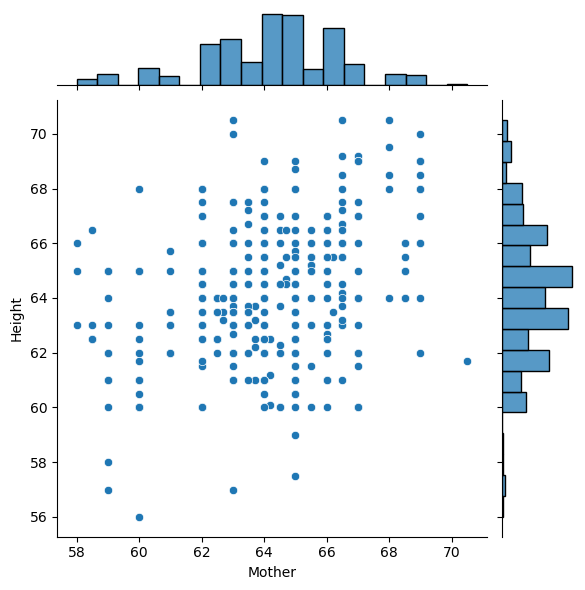

In [25]:
sns.jointplot(data=df_f, x='Mother', y='Height')

### Formulación del Modelo

In [27]:
# X debe ser una matriz (o DataFrame de una columna)
X = df_f[['Mother']] 
# y es un vector (o Serie)
y = df_f['Height']

In [29]:
X.head()

,Mother
1,67.0
2,67.0
3,67.0
6,66.5
7,66.5


### Validación Cruzada

In [ ]:
#Puse la librería arriba es: from sklearn.model_selection import train_test_split

In [31]:
# Asignamos una semilla (random_state) para asegurar la reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Tamaño del conjunto de prueba: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Tamaño del conjunto de entrenamiento: 346 (79.91%)
Tamaño del conjunto de prueba: 87 (20.09%)


### Entrenamiento del modelo lineal

In [ ]:
# También puse la librería al comienzo, es: from sklearn.linear_model import LinearRegression

In [37]:
# Inicializar el modelo de Regresión Lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
# coeficientes ajustados

# Coeficiente ajustado (Pendiente, m o β₁)
# La forma de acceder es lm.coef_[0] porque solo hay una variable predictora
print(f"Coeficiente (m o β₁): {lm.coef_[0]:.4f}")


Coeficiente (m o β₁): 0.3256


In [43]:
# intercepto

# Intercepto (Origen, b o β₀)
print(f"Intercepto (b o β₀): {lm.intercept_:.4f}")

Intercepto (b o β₀): 43.1703


In [45]:
# Alt Hija = a? + b? * Alt Madre

print(f"Modelo: Altura Hija = {lm.intercept_:.4f} + {lm.coef_[0]:.4f} * Altura Madre")

Modelo: Altura Hija = 43.1703 + 0.3256 * Altura Madre


#### Haciendo algunas predicciones

In [47]:
p1 = [[62]]
lm.predict(p1)

/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.35850788])

In [49]:
p2 = [[50], [55], [60], [65], [70]]	
lm.predict(p2)


/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59.45110637, 61.07919033, 62.70727429, 64.33535826, 65.96344222])

In [51]:
y_pred = lm.predict(X_test)

In [53]:
y_pred[:5]

array([64.00974146, 64.66097505, 63.68412467, 64.33535826, 64.66097505])

In [55]:
y_test[:5]

881    60.0
137    66.5
357    64.0
54     64.5
765    65.5
Name: Height, dtype: float64

In [ ]:
# Guardamos y_test como y_true para usarlo en gráficos posteriores
y_true = y_test
y_true.head()

#### Graficando la recta de regresión

In [ ]:
plt.scatter(df_f['Mother'],df_f['Height'], label='Mediciones')
plt.plot(X,lm.predict(X), color='black', label='Regresion')
plt.xlabel('Altura Madre')
plt.ylabel('Altura Hija')
plt.title('Altura Madre v/s Hija')
plt.legend(loc=0)

#### Métricas de Error

In [ ]:
# Cálculo de residuales (error = real - predicho)
residuals = y_test - y_pred
residuals.head()

Calculando las métricas de error

In [ ]:
# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

In [ ]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

Indicador R-cuadrado

In [ ]:
# R-Squared
r2 = metrics.r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")

#### Análisis de Residuales

In [ ]:
sns.distplot(y_pred-y_test, bins=20)

Graficamos el valor real versus el valor predicho

In [ ]:
plt.scatter(y_true, y_pred)
plt.xlabel('Valor real (y_test)')
plt.ylabel('Valor predicho (y_pred)')
plt.title('Valores reales vs predichos')
plt.show()

### Hipótesis de Trabajo 2

La altura de la hija depende de la altura del padre y de la altura de la madre de forma lineal

In [ ]:
df_f.head()

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4


#### Formulación del Modelo

In [ ]:
# Variables predictoras: altura del padre y de la madre
X2 = df_f[['Father', 'Mother']]

# Variable objetivo: altura de la hija
y2 = df_f['Height']

In [ ]:
X2.head()

In [ ]:
y2.head()

#### Validación Cruzada

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
print(f"Tamaño entrenamiento: {len(X2_train)} ({len(X2_train)/len(X2)*100:.2f}%)")
print(f"Tamaño prueba: {len(X2_test)} ({len(X2_test)/len(X2)*100:.2f}%)")

In [ ]:
X2_train.head()

#### Entrenamiento del Regresor Lineal

In [ ]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

In [ ]:
# coeficientes ajustados del modelo
coef_padre, coef_madre = lm2.coef_
print(f"Coeficiente Padre: {coef_padre:.4f}")
print(f"Coeficiente Madre: {coef_madre:.4f}")

In [ ]:
# intercepto
intercepto2 = lm2.intercept_
print(f"Intercepto: {intercepto2:.4f}")

In [ ]:
# Modelo:
# Alt Hija = a? + b?*AltPadre + c?*AltMadre
print("Modelo: Altura Hija = {:.4f} + {:.4f} * Altura Padre + {:.4f} * Altura Madre".format(intercepto2, coef_padre, coef_madre))

#### Métricas de Error

In [ ]:
# hacemos predicciones con el nuevo modelo
y2_pred = lm2.predict(X2_test)

In [ ]:
# Mean Absolute Error
mae2 = metrics.mean_absolute_error(y2_test, y2_pred)
print(f"MAE: {mae2:.4f}")

In [ ]:
# Mean Squared Error
mse2 = metrics.mean_squared_error(y2_test, y2_pred)
print(f"MSE: {mse2:.4f}")

In [ ]:
# Root Mean Squared Error
rmse2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
print(f"RMSE: {rmse2:.4f}")

In [ ]:
# R-Squared
r2_multi = metrics.r2_score(y2_test, y2_pred)
print(f"R^2: {r2_multi:.4f}")

In [ ]:
# en este modelo con dos variables se logra explicar el ????% de la varianza de "y" (alt hija)
print(f"En este modelo con dos variables se logra explicar el {r2_multi*100:.2f}% de la varianza de y (altura hija)")

### Hipótesis 3


In [ ]:
import json
import os
import io

# ⚠️ PASO CLAVE: Reemplaza 'nombre_de_tu_notebook.ipynb'
# con el nombre exacto del archivo en el que estás trabajando.
NOMBRE_DEL_ARCHIVO_ACTUAL = '06 - Demo Regresiones Lineales SKLearn (Resuelto).ipynb' 

def obtener_texto_completo_de_notebook(nombre_archivo):
    """Lee el archivo .ipynb (JSON) y extrae todo el código y texto."""
    
    if not os.path.exists(nombre_archivo):
        return f"Error: El archivo '{nombre_archivo}' no se encontró en el directorio actual. Verifica el nombre."
    
    try:
        with open(nombre_archivo, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except Exception as e:
        return f"Error al leer el archivo JSON: {e}"

    output = io.StringIO()
    
    # Recorrer todas las celdas del notebook
    for i, cell in enumerate(data['cells']):
        cell_type = cell['cell_type'].upper()
        
        # Obtener el contenido de la celda
        source = "".join(cell['source'])
        
        # Escribir en el buffer (salida)
        output.write("-" * 50 + "\n")
        output.write(f"### CELDA {i+1} ({cell_type}) ###\n")
        output.write("-" * 50 + "\n")
        output.write(source)
        output.write("\n\n")

    return output.getvalue()

# Ejecutar la función y almacenar el contenido
contenido_del_notebook = obtener_texto_completo_de_notebook(NOMBRE_DEL_ARCHIVO_ACTUAL)

# Imprimir el contenido completo en la salida de esta celda
print(contenido_del_notebook)

--------------------------------------------------
### CELDA 1 (MARKDOWN) ###
--------------------------------------------------
---
# Regresiones Lineales SKLearn


---

--------------------------------------------------
### CELDA 2 (CODE) ###
--------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

--------------------------------------------------
### CELDA 3 (MARKDOWN) ###
--------------------------------------------------
#### Carga de los datos a analizar

--------------------------------------------------
### CELDA 4 (CODE) ###
--------------------------------------------------
df = pd.read_csv('Galton.txt', sep='\t')

--------------------------------------------------
### CELDA 5 (MARKDOWN) ###
--------------------------------------------------
#### Breve análisis exploratorio

--------------------------------------------------
### CELDA 6 (CODE) ###
-----------------------------------------